Polynomial regression is conceptually and difficulty wise very similar to multiple linear regression, as well as difficulty wise. Instead of mapping a linear relationship, poly reg maps a polynomial function with different degrees by using 'PolynomialFeatures' and creating a polynomial matrix of features to apply to a 'LinearRegression' model. This dataset is a simple dataset from Kaggle for predicting the base salary of a new employee joining a company based on prior years of experience/level. It also is great for visualization purposes!



### Importing the libraries
These are the three go to libraries for most ML.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset
I imported the dataset through Pandas dataframe then using iloc assign everything besides the last column as our independent variable(s) or X and the last column as our dependent variable or Y. The name of the dataset has to be updated and it must be in the same folder as your .py file or uploaded on Jupyter Notebooks or Google Collab.

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

### Training the Polynomial Regression model
After training the linear regression model we have to transform the degree of its data matrix into a given degree with the PolynomialFeatures function. First, we make a polynomial matrix of the features and then train that on a new linear regression model so it can make polynomial regression.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Graphing the Polynomial Regression model
This is simple matplotlib commands to plot the graph of the polynomial regression using np.arrange to make the curve smoother with smaller intervals of X being plugged into the function

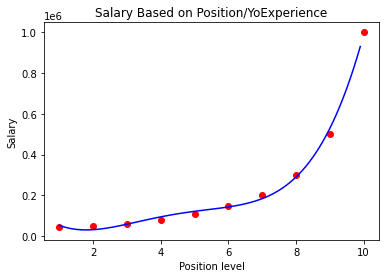

In [6]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X_grid))
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_pred, color = 'blue')
plt.title('Salary Based on Position/YoExperience')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Predicting a new result with our Polynomail Regression model
To predict a new result following our regression model we have to use the predict function but have to input the years of experience as a 2D array which is why we use [[]]  

In [7]:
lin_reg.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

### Evaluating Model Performance
We use two metrics to evaluate our model performance, r^2 being the more superior. These are both simple to understand and are covered in one of my Medium articles! Because of a small dataset, this model performed to a r2 of .99 which means 99% of the data can be predicted by our model.

In [8]:
y_pred2 = lin_reg.predict(poly_reg.fit_transform(X))
from sklearn.metrics import r2_score, mean_squared_error as mse
print("r^2: " + str(r2_score(y, y_pred2)))
print("MSE: " + str(mse(y, y_pred2)))

r^2: 0.9973922891706615
MSE: 210343822.8438155
